### Урок 4. Деревья решений

In [1]:
import numpy as np

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
x = X[2,:]
print(x)
print(y)
print(x >= 1000)
print(y[x >= 1000])
right_1 = (y[x >= 1000] == 0)
right_2 = (y[x >= 1000] == 1)
print('Нулей:', right_1.sum(), 'единиц:', right_2.sum())

[ 500.  700.  750.  600. 1450.  800. 1500. 2000.  450. 1000.]
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
[False False False False  True False  True  True False  True]
[1. 1. 0. 1.]
Нулей: 1 единиц: 3


In [4]:
def calc_gini(x, y, t):
    qty_all = len(y)
    qty_left = len(y[x < t])
    qty_right = qty_all - qty_left

    # Индекс Джини не будет равен бесконечности в таком случае,
    # но и считать его особо смысла нет, так как получается только одна ветвь
    if qty_left == 0 or qty_right == 0:
        return np.inf

    qty0_left = ((y[x < t]) == 0).sum()
    qty0_right = ((y[x >= t]) == 0).sum()

    p0_left = qty0_left / qty_left
    p1_left = 1 - p0_left

    p0_right = qty0_right / qty_right
    p1_right = 1 - p0_right

    # Нормировочный коэффициент для левого листа
    left_coef = qty_left / qty_all

    # Индекс Джини для левого листа
    h_left = p0_left * (1 - p0_left) + p1_left * (1 - p1_left)
    # Индекс Джини для правого листа
    h_right = p0_right * (1 - p0_right) + p1_right * (1 - p1_right)

    res = left_coef * h_left + (1 - left_coef) * h_right
    return res

In [5]:
# Расчёт критерия Джини

def gini(labels):
    #  подсчёт количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчёт критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity, classes

In [6]:
print(y[x >= 1000])
i, c = gini(y[x >= 1000])
print(i, c)

print(y[x < 1000])
i, c = gini(y[x < 1000])
print(i, c)

[1. 1. 0. 1.]
0.375 {1.0: 3, 0.0: 1}
[0. 0. 1. 0. 0. 1.]
0.4444444444444445 {0.0: 4, 1.0: 2}


In [7]:
# Расчёт прироста качества при разбиении вершины дерева

def quality_0(left_labels, right_labels):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    gini_left, _ = gini(left_labels)
    gini_right, _ = gini(right_labels)
    
    return p * gini_left + (1 - p) * gini_right

In [8]:
for t in x:
    print('Порог: {}, gini = {} ({})'.format(t, calc_gini(x, y, t), quality_0(y[x < t], y[x >= t])))

Порог: 500.0, gini = 0.4444444444444444 (0.4444444444444444)
Порог: 700.0, gini = 0.47619047619047616 (0.47619047619047616)
Порог: 750.0, gini = 0.4166666666666667 (0.4166666666666667)
Порог: 600.0, gini = 0.5 (0.5)
Порог: 1450.0, gini = 0.47619047619047616 (0.4761904761904763)
Порог: 800.0, gini = 0.48 (0.48)
Порог: 1500.0, gini = 0.5 (0.5)
Порог: 2000.0, gini = 0.4444444444444444 (0.4444444444444444)
Порог: 450.0, gini = inf (0.5)
Порог: 1000.0, gini = 0.4166666666666667 (0.4166666666666667)


## Практическое задание

1. В коде из методички реализуйте один или несколько критериев останова: количество листьев, количество используемых признаков, глубина дерева и т. д.
2. Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, и критерий Джини на дисперсию значений.

01

In [9]:
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
# сгенерируем данные
classification_data, classification_labels = make_classification(n_features=2, n_informative=2, 
                                                                 n_classes=2, n_redundant=0,
                                                                 n_clusters_per_class=1, 
                                                                 random_state=5, n_samples=500)

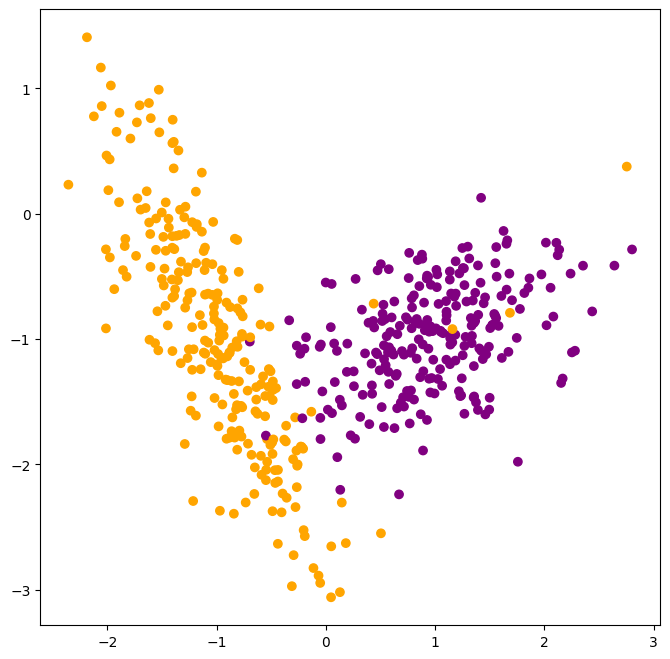

In [11]:
# визуализируем данные
colors = ListedColormap(['orange', 'purple'])
light_colors = ListedColormap(['wheat', 'plum'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), 
            list(map(lambda x: x[1], classification_data)), 
            c=classification_labels, cmap=colors);

In [12]:
# класс узла
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [13]:
# класс терминального узла (листа)
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # найдем класс, количество объектов которого будет максимальным в листе и вернем его    
        prediction = max(classes, key=classes.get)

        return prediction 

In [14]:
# расчет критерия Джини
def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
        
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2

    return impurity

In [15]:
# расчет прироста
def gain(left_labels, right_labels, root_gini):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
   
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [16]:
# разбиение датасета в узле
def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]

    return true_data, false_data, true_labels, false_labels

In [17]:
# нахождение наилучшего разбиения
# выбираем критерий останова: с помощью этой функции мы можем задать минимальное количество
# объектов в узле (по умолчанию 5) и/или максимальное количество признаков (по умолчанию None)

def find_best_split(data, labels, min_leaf, max_features):
    
    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1] if max_features is None else max_features 
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее указанного числа объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_gain = gain(true_labels, false_labels, root_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [18]:
# построение дерева с помощью рекурсивной функции с ограничением глубины и минимальным 
# количество элементов в листе
def build_tree(data, labels, max_depth=None, min_leaf=5, max_features=None):

    # Если глубина не задана, будем строить по максимуму
    max_depth = data.shape[0] * data.shape[1] if max_depth is None else max_depth

    gain, t, index = find_best_split(data, labels, min_leaf, max_features)

    #  прекращаем рекурсию, когда нет прироста в качестве или достигли максимальной глубины
    if not gain or not max_depth:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
    # Рекурсивно строим два поддерева, уменьшая их глубину
    true_branch = build_tree(true_data, true_labels, max_depth - 1, min_leaf, max_features)
    false_branch = build_tree(false_data, false_labels, max_depth - 1, min_leaf, max_features)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [19]:
def classify_object(obj, node):
    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [20]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [21]:
# печатаем ход нашего дерева
def print_tree(node, spacing=''):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(f'{spacing}Прогноз: {node.prediction}')
        return

    # Выведем значение индекса и порога на этом узле
    print(f'{spacing}Индекс {node.index} <= {node.t}')
    
    # Рекурсионный вызов функции на положительном поддереве
    print(f'{spacing}--> True:')
    print_tree(node.true_branch, spacing + '  ')

    # Рекурсионный вызов функции на отрицательном поддереве
    print(f'{spacing}--> False:')
    print_tree(node.false_branch, spacing + '  ')

In [22]:
# функция подсчета точности
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100

In [23]:
# Разобьем выборку на обучающую и тестовую
train_data, test_data, train_labels, test_labels = train_test_split(classification_data, 
                                                                    classification_labels, 
                                                                    test_size=.3,
                                                                    random_state=1)

In [24]:
train_data.shape

(350, 2)

In [25]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_labels)
# my_tree = build_tree(train_data, train_labels, min_leaf=1)
# my_tree = build_tree(train_data, train_labels, max_features=1)
# my_tree = build_tree(train_data, train_labels, max_depth=10)

In [26]:
print_tree(my_tree)

Индекс 0 <= -0.051771417967220734
--> True:
  Индекс 0 <= -0.36637542342372253
  --> True:
    Индекс 0 <= -0.7126883788993976
    --> True:
      Прогноз: 0
    --> False:
      Индекс 1 <= -1.3373577592210018
      --> True:
        Прогноз: 0
      --> False:
        Прогноз: 0
  --> False:
    Индекс 1 <= -1.8741394984788107
    --> True:
      Прогноз: 0
    --> False:
      Прогноз: 1
--> False:
  Индекс 1 <= -2.238294346478628
  --> True:
    Прогноз: 0
  --> False:
    Индекс 0 <= 1.1573428257768366
    --> True:
      Прогноз: 1
    --> False:
      Индекс 0 <= 1.1878872129209608
      --> True:
        Прогноз: 1
      --> False:
        Прогноз: 1


In [27]:
# ответы для обучающей выборки 
train_answers = predict(train_data, my_tree)

In [28]:
# ответы для тестовой выборки
answers = predict(test_data, my_tree)

In [29]:
# точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
train_accuracy

98.85714285714286

In [30]:
# точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, answers)
test_accuracy

94.66666666666667

Text(0.5, 1.0, 'Test accuracy=94.67')

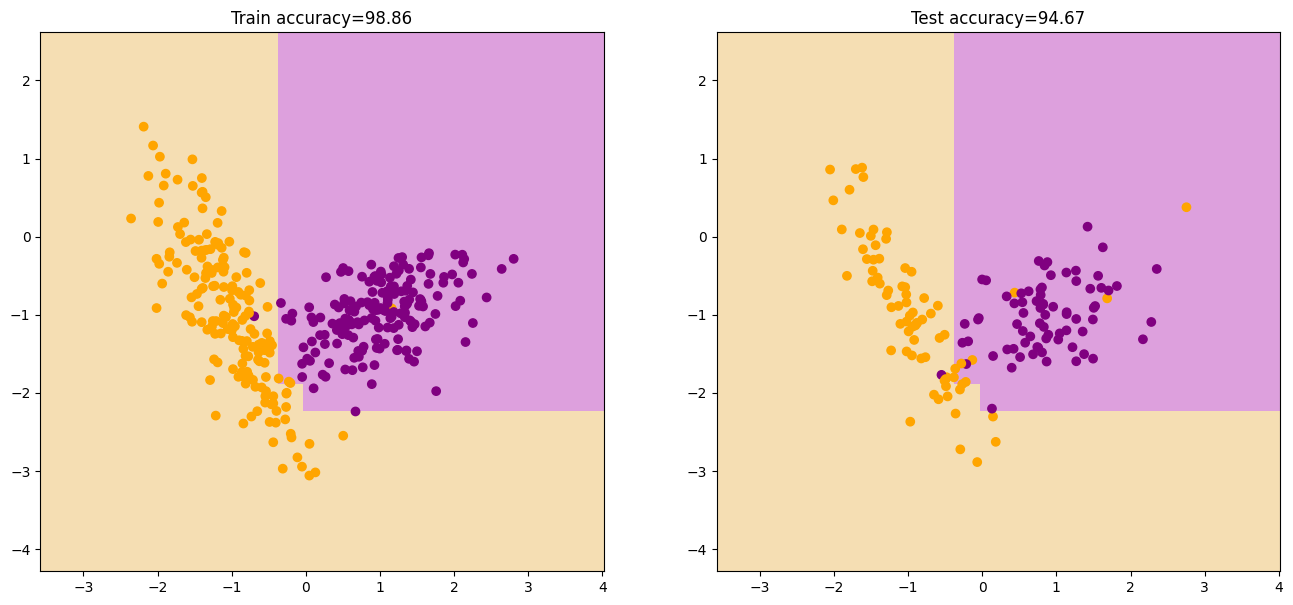

In [31]:
# визуализируем дерево на графике
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1, 2, 1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)
plt.title(f'Train accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)
plt.title(f'Test accuracy={test_accuracy:.2f}')

02

In [32]:
# класс листа для регрессии
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        return self.labels.mean()

In [33]:
def mse(seq):
    return np.mean((seq - seq.mean()) ** 2)

In [34]:
# Нахождение наилучшего разбиения

def find_best_split(x, y):     
    #  обозначим минимальное количество объектов в узле
    min_leaf = 4

    root_mse = mse(y)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = x.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in x])
        
        for t in t_values:
            true_x, false_x, true_y, false_y = split(x, y, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_x) < min_leaf or len(false_x) < min_leaf:
                continue
            
            current_gain = gain(true_y, false_y, root_mse)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [35]:
# Построение дерева с помощью рекурсивной функции

def build_tree(x, y, max_depth=15):

    gain, t, index = find_best_split(x, y)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if not gain or not max_depth:
        return Leaf(x, y)

    true_x, false_x, true_y, false_y = split(x, y, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_x, true_y, max_depth - 1)

    false_branch = build_tree(false_x, false_y, max_depth - 1)

    node = Node(index, t, true_branch, false_branch)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return node

In [36]:
data, target = make_regression(n_features=2, n_informative=2, random_state=5)

In [37]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=.3,
                                                                    random_state=1)

In [38]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_target)
print_tree(my_tree)

Индекс 0 <= -1.167278449710173
--> True:
  Прогноз: -121.39064849773837
--> False:
  Индекс 0 <= -0.8139120077465551
  --> True:
    Прогноз: -58.72073718195808
  --> False:
    Индекс 0 <= -0.24341970124625367
    --> True:
      Индекс 0 <= -0.689565232048181
      --> True:
        Прогноз: -65.9463328256142
      --> False:
        Индекс 0 <= -0.5017555471945
        --> True:
          Прогноз: -37.57645681930746
        --> False:
          Прогноз: -20.57908580411487
    --> False:
      Индекс 0 <= -0.10593044205742323
      --> True:
        Прогноз: -17.262696152828372
      --> False:
        Индекс 0 <= 0.012758316706164157
        --> True:
          Прогноз: 10.140019568773557
        --> False:
          Индекс 0 <= 0.2212541228509997
          --> True:
            Прогноз: 25.674141477308968
          --> False:
            Индекс 0 <= 0.3554384723493521
            --> True:
              Прогноз: 22.01482762272139
            --> False:
              Индекс 0 <= 0.4

In [39]:
train_answers = predict(train_data, my_tree)
train_r2 = r2_score(train_target, train_answers)
print(train_r2)

test_answers = predict(test_data, my_tree)
test_r2 = r2_score(test_target, test_answers)
print(test_r2)

0.9153983061193208
0.8233170909322728


Text(0.5, 1.0, 'Test accuracy=0.82')

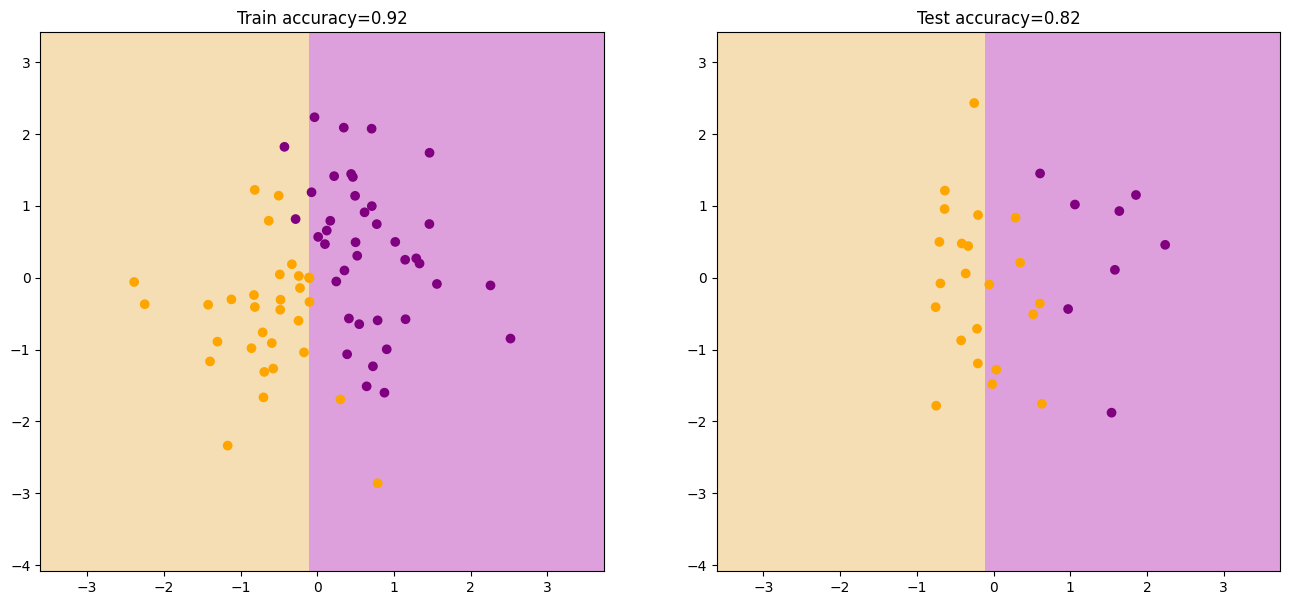

In [40]:
# визуализируем дерево на графике
def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1, 2, 1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, cmap=colors)
plt.title(f'Train accuracy={train_r2:.2f}')

# график тестовой выборки
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_target, cmap=colors)
plt.title(f'Test accuracy={test_r2:.2f}')